In [2]:
import pandas as pd
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
import keras_tuner as kt
from keras_tuner import RandomSearch
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from tensorflow.keras.optimizers import Adam, Adadelta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

In [4]:
train = pd.read_csv('train.csv')

In [9]:
train

,image_ID,label
0,7c225f7b61.jpg,Badminton
1,b31.jpg,Badminton
2,acb146546c.jpg,Badminton
3,0e62f4d8f2.jpg,Badminton
4,cfd2c28c74.jpg,Cricket
...,...,...
8222,903d2fffb3.jpg,Cricket
8223,b5f174c688.jpg,Badminton
8224,2433770a67.jpg,Tennis
8225,6403964166.jpg,Tennis


In [50]:
train = train.drop(542).reset_index(drop=True)

In [56]:
images = []
for i in train['image_ID']:
    images.append(i)

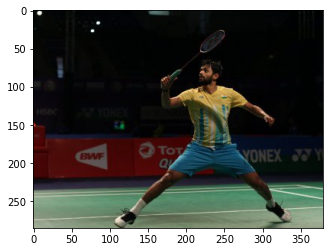

In [57]:
DATADIR = r'C:\Users\KIIT\Downloads\Sports Images\train'
for j in images:
    img_array = cv2.imread(os.path.join(DATADIR,j))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    break

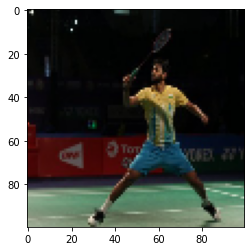

In [58]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [59]:
train_images = []
DATADIR = r'C:\Users\KIIT\Downloads\Sports Images\train'
for j in images:
    img_array = cv2.imread(os.path.join(DATADIR,j))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (100, 100), 3)
    train_images.append(new_array)

In [63]:
X = np.array(train_images)

In [64]:
X.shape

(8226, 100, 100, 3)

In [68]:
X = X/255
y = np.array(train['label'])

In [77]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [94]:
with open('X.pkl','wb') as f:
    pickle.dump(X, f)

In [95]:
with open('y.pkl','wb') as f:
    pickle.dump(y,f)

In [6]:
with open('X.pkl','rb') as f:
    X = pickle.load(f)
    
with open('y.pkl','rb') as f:
    y = pickle.load(f)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [11]:
len(np.unique(y_train))

7

In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation = "softmax"))

model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train, batch_size=16 ,epochs = 20, verbose = 1,validation_split = 0.15)

Epoch 1/20
350/350 [==============================] - 172s 492ms/step - loss: 1.8416 - accuracy: 0.3839 - val_loss: 2.2428 - val_accuracy: 0.2827
Epoch 2/20
350/350 [==============================] - 176s 502ms/step - loss: 1.3499 - accuracy: 0.4953 - val_loss: 1.4536 - val_accuracy: 0.5025
Epoch 3/20
350/350 [==============================] - 180s 514ms/step - loss: 1.1367 - accuracy: 0.5873 - val_loss: 1.6587 - val_accuracy: 0.4954
Epoch 4/20
350/350 [==============================] - 176s 503ms/step - loss: 0.9677 - accuracy: 0.6462 - val_loss: 1.4893 - val_accuracy: 0.5866
Epoch 5/20
350/350 [==============================] - 176s 502ms/step - loss: 0.8003 - accuracy: 0.7148 - val_loss: 1.2048 - val_accuracy: 0.5968
Epoch 6/20
350/350 [==============================] - 181s 517ms/step - loss: 0.6039 - accuracy: 0.7913 - val_loss: 1.2299 - val_accuracy: 0.6424
Epoch 7/20
350/350 [==============================] - 185s 529ms/step - loss: 0.4822 - accuracy: 0.8387 - val_loss: 1.3380 -

In [38]:
Y_test = [np.argmax(y, axis=None, out=None) for y in model.predict(X_test)]

In [36]:
y_test

array([6, 6, 2, ..., 1, 5, 5])

In [41]:
confusion_matrix(y_test,Y_test)

array([[204,   9,   2,   8,   6,  25,  12],
       [ 14, 242,   5,  29,   1,  18,   4],
       [  9,  12,  57,   8,   2,  21,   5],
       [ 17,  28,   9, 150,   3,  36,   6],
       [  7,   0,   2,   0, 104,  12,   3],
       [ 17,  17,  12,   9,  11, 221,   7],
       [ 21,  10,   7,  10,   2,   8, 224]], dtype=int64)

In [42]:
accuracy_score(y_test, Y_test)

0.7302551640340219